In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk

# Gensim = “Generate Similar”

Gensim is a free open-source Python library for representing documents as semantic vectors, as efficiently (computer-wise) and painlessly (human-wise) as possible.

Gensim is designed to process raw, unstructured digital texts (“plain text”) using unsupervised machine learning algorithms.

The algorithms in Gensim, such as Word2Vec, FastText, Latent Semantic Indexing (LSI, LSA, LsiModel), Latent Dirichlet Allocation (LDA, LdaModel) etc, automatically discover the semantic structure of documents by examining statistical co-occurrence patterns within a corpus of training documents. These algorithms are unsupervised, which means no human input is necessary – you only need a corpus of plain text documents.

In [ ]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
glove_model.save('glove.bin')

In [ ]:
glove_model['beautiful']

array([-2.3852e-01, -3.3704e-01, -2.6531e-01, -3.4693e-01, -1.2875e-01,
        1.0698e-01, -2.4669e-02,  2.6829e-02, -1.0024e-01, -9.1494e-01,
        4.8989e-01, -1.0362e-01, -2.4535e-01,  5.7003e-01, -3.5189e-02,
       -3.7690e-01, -6.9177e-02, -2.5942e-01,  2.2511e-01,  5.1855e-01,
       -3.9326e-01,  1.2665e+00, -4.4396e-01,  7.6827e-01, -1.0909e-02,
       -2.4237e-01, -1.0275e-01, -4.9712e-01, -8.0183e-02,  4.0611e-01,
        2.1275e-01,  6.5182e-01, -1.1487e+00,  4.6080e-03, -6.8265e-01,
        9.6941e-01, -7.6194e-02, -4.1590e-01, -2.7069e-01, -5.3364e-02,
       -7.9631e-02, -2.6670e-01, -2.1544e-02,  2.2392e-01,  5.5741e-02,
        8.4611e-02,  8.6011e-01,  4.8927e-01,  4.7428e-01, -2.4446e-01,
       -2.1553e-01,  1.4370e-01,  5.0683e-01, -5.8435e-01, -5.6243e-01,
       -6.3757e-02, -2.2861e-01, -6.9374e-02,  5.6618e-01, -8.7813e-02,
       -2.1272e-01, -1.6319e-01,  3.3545e-01,  1.3707e-01, -1.1920e-03,
        9.7461e-02,  3.2382e-01, -2.2693e-01, -1.7767e-01,  4.01

In [ ]:
glove_model.most_similar("friday")

[('thursday', 0.9821224212646484),
 ('monday', 0.9758938550949097),
 ('tuesday', 0.9734106659889221),
 ('wednesday', 0.971026599407196),
 ('saturday', 0.8776869773864746),
 ('sunday', 0.8603045344352722),
 ('week', 0.794519305229187),
 ('afternoon', 0.7875707745552063),
 ('earlier', 0.7377878427505493),
 ('morning', 0.737604558467865)]

# queen - girl + boy = king

In [ ]:
glove_model.most_similar(positive=['queen','boy'],
                         negative = ['girl'],topn=10)

[('king', 0.6770139932632446),
 ('monarch', 0.5442801117897034),
 ('elizabeth', 0.5344177484512329),
 ('majesty', 0.5312743186950684),
 ('ii', 0.5138020515441895),
 ('royal', 0.5046806335449219),
 ('throne', 0.49595192074775696),
 ('prince', 0.4886452555656433),
 ('princess', 0.4612610340118408),
 ('vi', 0.4535139799118042)]

# king - boy + girl = Queen

In [ ]:
glove_model.most_similar(positive = ['girl','king'],
                         negative = ['boy'], topn = 1)

[('queen', 0.6850624084472656)]

# visualization

In [ ]:
vocab = ['boy', 'girl', 'man', 'king', 'queen' , 'banana', 'mango' , 'fruit', 'coconut', 'orange', 'kiwi', 'guava',
         'person', 'people', 'prince', 'princess', 'monarch', 'sunday', 'monday', 'tuesday', 'wednesday',
         'thursday', 'friday', 'sunday', 'holiday', 'pen', 'pencil', 'eraser', 'school', 'teacher', 'board']

In [ ]:
def tsne_plot(model):
  labels = []
  wordvecs = []

  for word in vocab:
    wordvecs.append(model[word]) # saves the word representation in an array
    labels.append(word) # saves the words in an array

  wordvecs = np.array(wordvecs)  # Convert to NumPy array

  tsne_model = TSNE(perplexity = 3, n_components = 2,
                    init = 'pca', random_state = 41)

  coordinates = tsne_model.fit_transform(wordvecs)

  x,y = [], []

  for value in coordinates:
    x.append(value[0])
    y.append(value[1])

    plt.figure(figsize = (8,8))

  for i in range(len(x)):
    plt.scatter(x[i], y[i])
    plt.annotate(labels[i],
                  xy = (x[i], y[i]),
                  xytext = (2,2),
                  textcoords = 'offset points',
                  ha = 'right',
                  va = 'bottom')
  plt.show()

<ipython-input-22-da5a9bc2a373>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (8,8))


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

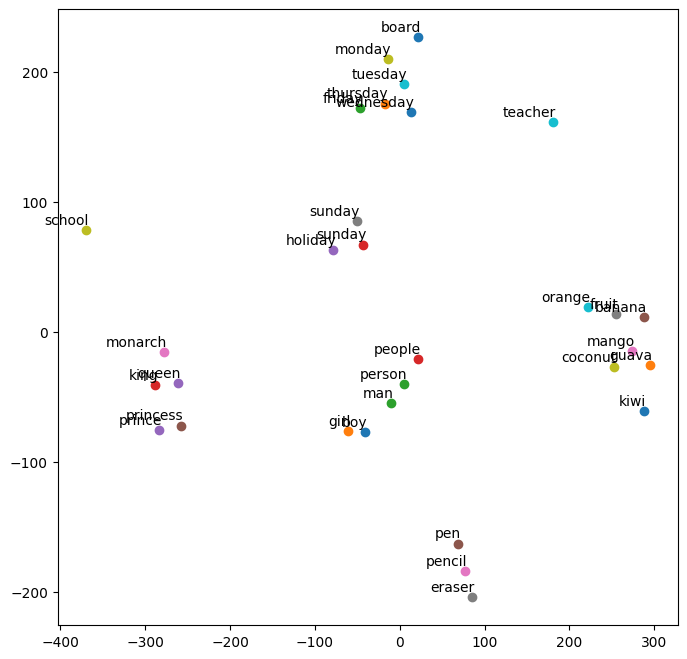

In [ ]:
tsne_plot(glove_model)

# Getting into Transfer Learning of GloVe

In [ ]:
import numpy as np
import pandas as pd
import gensim
import tensorflow
import gensim.downloader as api

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, Conv1D, GlobalMaxPooling1D, Dropout, Reshape

from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
train = fetch_20newsgroups(subset='train', shuffle = True)
test = fetch_20newsgroups(subset='test', shuffle = True)

# Labels to be predicted

In [ ]:
categories = train.target_names
categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
pd.Series(train.target).value_counts()

10    600
15    599
8     598
9     597
11    595
7     594
13    594
5     593
14    593
2     591
12    591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
dtype: int64

<Axes: >

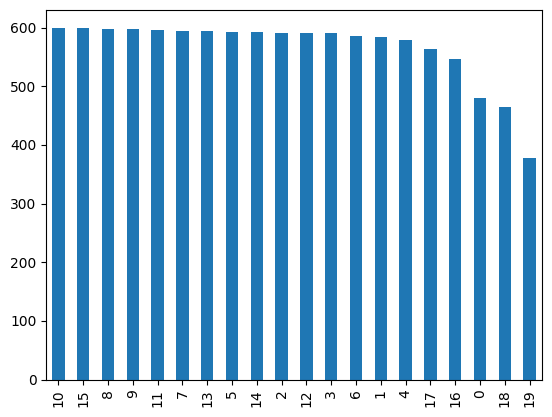

In [ ]:
pd.Series(train.target).value_counts().plot(kind= 'bar')

In [ ]:
len(train.data), len(test.data)

(11314, 7532)

In [ ]:
len(categories)

20

In [ ]:
# downloading nltk dependencies
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
all_stopwords = stopwords.words('english')
all_stopwords = [w for w in all_stopwords ]

def preprocessing(data):
    corpus = []
    for i in range(len(data)):
        # remove urls
        tweet = re.sub(r'http\S+', ' ', data[i]) # links

        # remove html tags
        tweet = re.sub(r'<.*?>', ' ', tweet) # tags
        tweet = re.sub('&\w+([-.]\w+)*', ' ', tweet) # colorcodes

        # remove digits
        tweet = re.sub(r'\d+', ' ', tweet)
        tweet = re.sub('@\w+([-.]\w+)*', ' ', tweet) # mentions

        # remove emojis
        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
        tweet = emoji_pattern.sub(r'', tweet) # no emoji

        # remove hashtags
        tweet = re.sub(r'#\w+', ' ', tweet) # hashtags
        tweet = re.sub(r'[^\w\s]', '', tweet) # punctuations
        review = re.sub('[^a-zA-Z]', ' ', tweet) # any characters other than alphabets
        review = review.lower() # casefolding
        review = review.split()
        lemma= WordNetLemmatizer() # lemmatization
        review = [lemma.lemmatize(word) for word in review if word not in all_stopwords]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [ ]:
x_train = preprocessing(train.data)

In [ ]:
x_test = preprocessing(test.data)

In [ ]:
x_train[:3]

['lerxst wheres thing subject car nntppostinghost rac wamumdedu organization university maryland college park line wondering anyone could enlighten car saw day door sport car looked late early called bricklin door really small addition front bumper separate rest body know anyone tellme model name engine spec year production car made history whatever info funky looking car please email thanks il brought neighborhood lerxst',
 'guykuo guy kuo subject si clock poll final call summary final call si clock report keywords siaccelerationclockupgrade articleid shelley qvfo innc organization university washington line nntppostinghost carsonuwashingtonedu fair number brave soul upgraded si clock oscillator shared experience poll please send brief message detailing experience procedure top speed attained cpu rated speed add card adapter heat sink hour usage per day floppy disk functionality floppy especially requested summarizing next two day please add network knowledge base done clock upgrade h

In [ ]:
x_test[:3]

['v mb k neil b gandler subject need info bonneville organization university buffalo line newssoftware vaxvms vnews nntppostinghost ubvmsdccbuffaloedu little confused model bonnevilles heard le se lse sse ssei could someone tell difference far feature performance also curious know book value prefereably model much le book value usually get word much demand time year heard midspring early summer best time buy neil gandler',
 'rick miller subject xface organization line distribution world nntppostinghost summary go ahead swamp im familiar format xface thingies seeing folk header ive got see maybe make one ive got dpgview linux box display uncompressed xfaces ive managed compile uncompface im looking cant seem find xfaces anyones news header could would please send xface header know ill probably get little swamped handle hope rick miller ricxjo muelisto send postcard get one back enposxtigu bildkarton kaj vi ricevos alion rick miller wood muskego wi usa',
 'mathew subject strong weak athe

# **Converting text data to sequences of integers and padding**

In [ ]:
# step-1 Tokenization

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [ ]:
# step-2 Convert text data into sequence of integers

train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)


In [ ]:
# checking the size of the vocabulary for the given corpus

vocab_size = len(tokenizer.word_index)+1
vocab_size

110733

In [ ]:
# step-4 padding the sequence to make them of same length

maxlen = 100
x_train = pad_sequences(train_seq, maxlen = maxlen, padding = 'post')
x_test= pad_sequences(test_seq, maxlen = maxlen, padding = 'post')

In [ ]:
x_train.shape

(11314, 100)

In [ ]:
x_test.shape

(7532, 100)

In [ ]:
y_train = train.target
y_train

array([7, 4, 4, ..., 3, 1, 8])

In [ ]:
y_test = test.target
y_test

array([ 7,  5,  0, ...,  9,  6, 15])

In [ ]:
y_train = to_categorical(y_train, 20)
y_test = to_categorical(y_test, 20)

# **LSTM**

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim = len(glove_model.index_to_key),
         output_dim = 300,
         input_length = maxlen,
         weights = [glove_model.vectors],
         trainable = False))
lstm_model.add(LSTM(128, return_sequences = True))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(20,activation='softmax'))


In [ ]:
lstm_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 300)          120000000 
                                                                 
 lstm_12 (LSTM)              (None, 100, 128)          219648    
                                                                 
 lstm_13 (LSTM)              (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 20)                1300      
                                                                 
Total params: 120,270,356
Trainable params: 270,356
Non-trainable params: 120,000,000
_________________________________________________________________


In [ ]:
lstm_model.compile(loss = "categorical_crossentropy",optimizer='adam',
             metrics = ['accuracy'])

In [ ]:
lstm_model_history = lstm_model.fit(x_train,y_train,epochs=15,
                        validation_data=(x_test,y_test))

Epoch 1/15
354/354 [==============================] - 172s 464ms/step - loss: 2.8894 - accuracy: 0.1077 - val_loss: 2.8189 - val_accuracy: 0.1265
Epoch 2/15
354/354 [==============================] - 175s 495ms/step - loss: 2.5372 - accuracy: 0.2169 - val_loss: 2.4461 - val_accuracy: 0.2315
Epoch 3/15
354/354 [==============================] - 181s 510ms/step - loss: 2.1480 - accuracy: 0.3311 - val_loss: 2.2359 - val_accuracy: 0.2970
Epoch 4/15
354/354 [==============================] - 186s 525ms/step - loss: 1.8304 - accuracy: 0.4157 - val_loss: 2.1183 - val_accuracy: 0.3343
Epoch 5/15
354/354 [==============================] - 176s 499ms/step - loss: 1.5378 - accuracy: 0.5059 - val_loss: 2.1147 - val_accuracy: 0.3621
Epoch 6/15
354/354 [==============================] - 178s 502ms/step - loss: 1.3258 - accuracy: 0.5722 - val_loss: 1.8867 - val_accuracy: 0.4080
Epoch 7/15
354/354 [==============================] - 180s 508ms/step - loss: 1.1061 - accuracy: 0.6407 - val_loss: 1.9409 -

In [ ]:
import matplotlib.pyplot as plt
def plot_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("CNN  Accuracy ")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()

def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("CNN  Loss ")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()



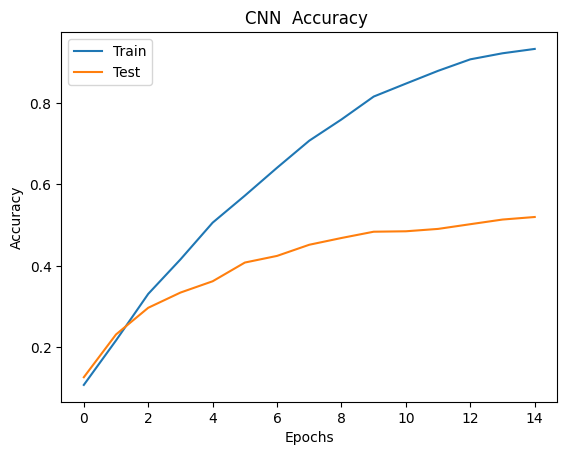

In [ ]:
plot_acc(lstm_model_history)

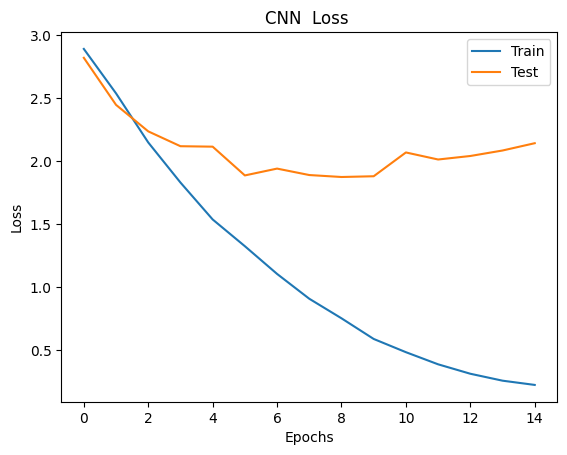

In [ ]:
plot_loss(lstm_model_history)

# **CNN-1D**

In [ ]:
cnn_1d = Sequential()
cnn_1d.add(Embedding(input_dim = len(glove_model.index_to_key),
         output_dim = 300,
         input_length = maxlen,
         weights = [glove_model.vectors],
         trainable = False))

cnn_1d.add(Conv1D(64,8,activation = 'relu'))
# cnn_1d.add(MaxPooling1D(2))
cnn_1d.add(Dropout(0.5))

cnn_1d.add(Dense(32,activation = 'relu'))
# cnn_1d.add(Dropout(0.5))

cnn_1d.add(Dense(16,activation = 'relu'))

cnn_1d.add(GlobalMaxPooling1D())

cnn_1d.add(Dense(20,activation='softmax'))



In [ ]:
cnn_1d.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy' ,
               metrics = ['accuracy'])

In [ ]:
cnn_history = cnn_1d.fit(x_train,y_train,epochs=15,
                        validation_data=(x_test,y_test))

Epoch 1/15
354/354 [==============================] - 40s 108ms/step - loss: 2.9956 - accuracy: 0.0660 - val_loss: 2.9666 - val_accuracy: 0.0936
Epoch 2/15
354/354 [==============================] - 43s 121ms/step - loss: 2.8761 - accuracy: 0.1233 - val_loss: 2.8276 - val_accuracy: 0.1560
Epoch 3/15
354/354 [==============================] - 41s 116ms/step - loss: 2.6215 - accuracy: 0.2072 - val_loss: 2.6622 - val_accuracy: 0.2067
Epoch 4/15
354/354 [==============================] - 42s 118ms/step - loss: 2.3918 - accuracy: 0.2697 - val_loss: 2.5530 - val_accuracy: 0.2350
Epoch 5/15
354/354 [==============================] - 47s 133ms/step - loss: 2.1745 - accuracy: 0.3345 - val_loss: 2.4668 - val_accuracy: 0.2617
Epoch 6/15
354/354 [==============================] - 39s 110ms/step - loss: 2.0053 - accuracy: 0.3786 - val_loss: 2.4016 - val_accuracy: 0.2800
Epoch 7/15
354/354 [==============================] - 40s 113ms/step - loss: 1.8724 - accuracy: 0.4224 - val_loss: 2.3605 - val_ac

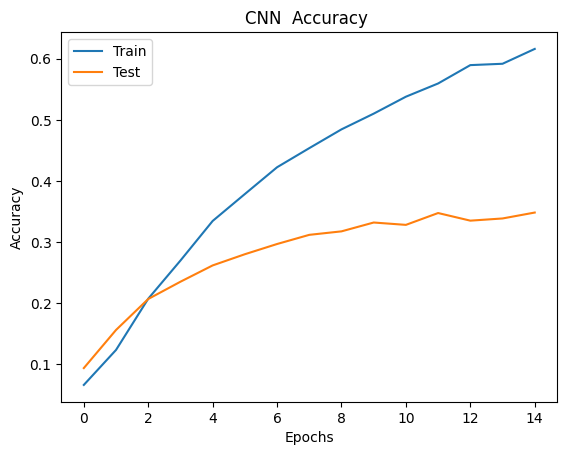

In [ ]:
plot_acc(cnn_history)

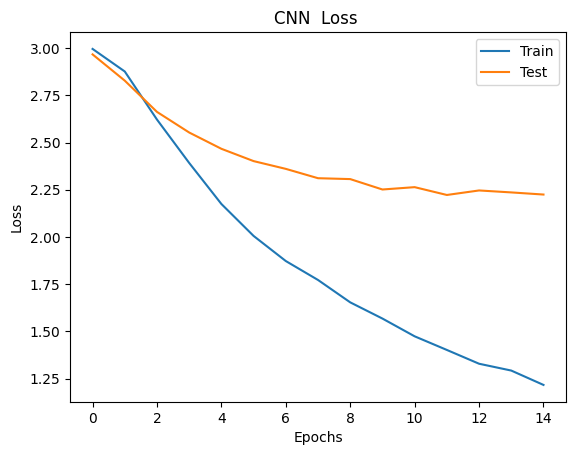

In [ ]:
plot_loss(cnn_history)